# Para Saber Mais

## 1 - Figures e Axes
Na biblioteca Matplotlib possuímos uma série de elementos para a criação de visualizações e como elas se distribuem na tela. Ela possui uma estrutura orientada a objetos em que esses elementos determinam como um gráfico é construído.

Aqui, vamos falar de dois elementos que são bastante utilizados no nosso curso: o figure e o axes.

O figure, ou de maneira abreviada fig, representa a área total da figura, ou seja, o espaço onde podemos preencher seja com os gráficos ou com as informações que queremos descrever. Seria algo semelhante a uma tela em branco em que podemos criar um ou mais gráficos, colocar título, textos e legendas, adicionar figuras geométricas, etc.

Já o axes, ou de maneira abreviada ax, representa os eixos onde os dados são representados como elementos gráficos: linhas, pontos, barras, etc. Ele fornece o sistema de coordenadas onde posicionamos e traçamos os nossos dados. É possível criar um ou mais eixos dentro de uma figura usando, por exemplo, a função plt.subplots().

A imagem abaixo apresenta esses dois objetos da biblioteca Matplotlib:

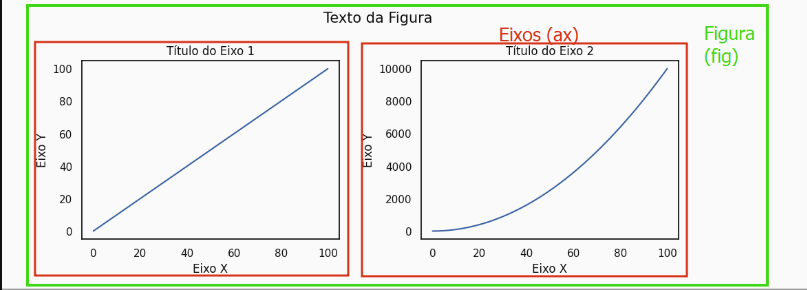

Em resumo, notamos o fig como a figura completa, enquanto o ax representa cada um dos gráficos representados.

## 2 - Crosstab
O crosstab, ou tabela cruzada, é uma função da biblioteca pandas utilizada para analisar a relação entre duas variáveis categóricas. Ela cria uma tabela com as variáveis categóricas como índices e colunas onde são exibidos os valores únicos de cada variável nesse formato. Os valores da tabela são a combinação entre as duas variáveis.

Ela é útil para fins de comparação entre as frequências de diferentes grupos, identificação de padrões ou associações entre variáveis.

A sintaxe básica do crosstab é a seguinte:
```
pd.crosstab(index, columns, values, aggfunc, normalize)
```

Onde:

- **index**: valores para agrupar nas linhas da tabela
- **columns**: valores para agrupar nas colunas da tabela
- **values**: valores da tabela a partir da função de agregação (`aggfunc`)
- **aggfunc**: função de agregação dos dados, por exemplo `”sum”`
- **normalize**: normalização dos dados. Pode ser por colunas, linhas ou ambos.
Aqui abaixo temos um exemplo simples utilizando o crosstab:

In [1]:
import pandas as pd

# DataFrame exemplo
df = pd.DataFrame({'produto': ['Régua', 'Lápis', 'Régua', 'Lápis', 'Régua', 'Lápis', 'Régua'],
                   'cliente': ['B2B', 'B2C', 'B2B', 'B2B', 'B2C', 'B2B', 'B2C'],
                   'quantidade': [100, 5, 50, 200, 10, 50, 3]})

# Aplicando o crosstab
vendas = pd.crosstab(index = df.produto, columns = df.cliente, 
                     values = df.quantidade, aggfunc = "sum")

# Lendo a crosstab
vendas

cliente,B2B,B2C
produto,,
Lápis,250,5
Régua,150,13


Neste exemplo, temos um DataFrame com três colunas: produto, cliente, quantidade. Utilizamos a tabela cruzada para agrupar os dados de produto e cliente somando a quantidade de produtos correspondentes a cada um.

Dessa forma, a função crosstab nos ajuda a obter uma visão clara da distribuição dos dados, a identificar padrões e a entender a relação entre variáveis categóricas.

## 3 - BarContainer
Vimos no vídeo anterior como trabalhar com a função `ax.label()` para a escrita dos valores nas colunas do nosso gráfico de colunas empilhadas. Para conseguir fazer uso dessa função, precisamos trabalhar com os objetos **container**, mais precisamente o **BarContainer**.

O objeto **BarContainer** é uma estrutura que representa o conjunto de barras verticais ou horizontais em um gráfico de barras e/ou colunas na biblioteca Matplotlib.

Quando usamos o método `bar()` ou o parâmetro `“bar”` na construção dos gráficos de barras e colunas é retornado um objeto BarContainer contendo informações sobre as barras criadas. Esse objeto pode ser usado para personalizar e acessar propriedades das barras individualmente ou em conjunto.

Algumas propriedades importantes do objeto **BarContainer** são:
- **containers**: lista dos objetos `Rectangle` que representam as barras.
- **patches**: lista das instâncias de `Patch` que representam as barras.
Essas duas propriedades do objeto BarContainer são úteis quando desejamos fazer modificações específicas nas barras de um gráfico de barras ou colunas, como alterar cores, rótulos ou outras propriedades visuais. Elas fornecem acesso aos elementos individuais das barras e permitem a personalização do gráfico.

Por exemplo, vamos retomar o exemplo da atividade anterior. O gráfico produzido foi este abaixo:
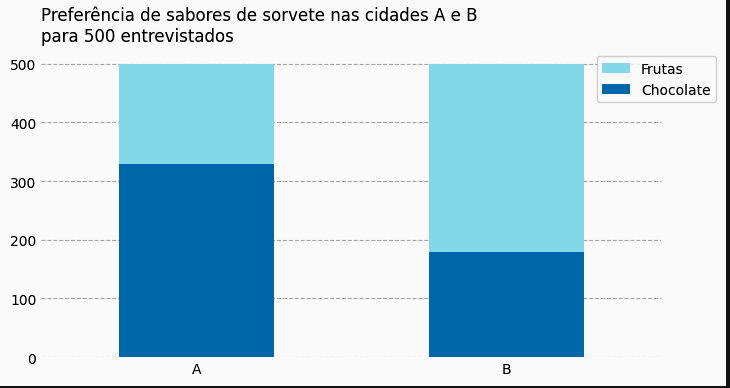

Se quisermos acessar as propriedades de cada coluna **Frutas** e **Chocolate** dentro das colunas A e B, podemos utilizar um laço for que itera na lista de containers (`ax.containers`) passando cada container, no nosso exemplo as colunas A e B. Na sequência, com um novo laço **for** em cada container podemos resgatar os objetos `Rectangle` responsáveis pelo desenho das colunas **Frutas** e **Chocolate** na área do gráfico, como podemos visualizar no código abaixo e na saída deste código:

In [ ]:
for container in ax.containers:
  print(container)
  for valores in container:
    print(valores)
  print("")

Saída:
```python
<BarContainer object of 2 artists>
Rectangle(xy=(-0.25, 0), width=0.5, height=330, angle=0)
Rectangle(xy=(0.75, 0), width=0.5, height=180, angle=0)

<BarContainer object of 2 artists>
Rectangle(xy=(-0.25, 330), width=0.5, height=170, angle=0)
Rectangle(xy=(0.75, 180), width=0.5, height=320, angle=0)
```

Note que num gráfico de colunas cada container guarda: as coordenadas do canto inferior esquerdo da coluna (`xy`), as medidas de largura (`width`) e altura (`height`) e o ângulo de desenho da barra (`angle`).

Tendo [acesso a esses parâmetros específicos](https://matplotlib.org/stable/tutorials/intermediate/artists.html#object-containers) e utilizando os métodos tanto de `containers` quanto `patches` podemos ter mais controle na personalização de nossos gráficos.

## 4 - formatação do eixo do tempo
Sabemos que um gráfico de linhas é o ideal para representação de dados temporais, seja para investigar a evolução dos dados ao longo do tempo ou para identificar padrões e tendências em nossos dados. Por isso, é muito importante escolher o tempo que estamos analisando e como vamos representá-lo, por exemplo, em valores diários, trimestrais, anuais entre outros.

Na biblioteca Matplotlib, temos dois métodos que auxiliam na construção de gráficos de linhas ao lidar com diferentes intervalos de dados: `set_major_locator` e `set_major_formatter`. Eles estão disponíveis na manipulação de objetos no eixo (**Axes**) e, de maneira resumida, possuem as seguintes características:

### `set_major_locator`
É utilizado para definir a localização dos principais marcadores (ticks) no eixo do gráfico. Ele permite controlar a posição dos marcadores ao longo do eixo, sendo útil tanto para dados temporais quanto para dados que não estão uniformemente espaçados.

Por exemplo, se nós estivermos plotando dados diários em um gráfico de linha com um período de um ano, o espaçamento padrão dos marcadores fica muito denso e torna o gráfico difícil de ler. Nesse caso, nós podemos utilizar o `set_major_locator` para especificar um espaçamento maior entre os marcadores, como a cada mês ou a cada ano, dependendo do intervalo dos dados.

Dentro da própria Matplotlib existe o módulo [dates](https://matplotlib.org/stable/api/dates_api.html) que facilita a localização dos ticks das mais variadas formas de tempo, trazendo uma série de métodos que são combinados ao `set_major_locator`, por exemplo:
- `DayLocator`: localiza o dia do mês. Podemos pontuar qual ou quais dias específicos do mês gostaríamos de avaliar ou o intervalo de exibição de dias (15 em 15 dias, por exemplo);
- `MonthLocator`: localiza os meses pelo número do mês. Aqui também podemos escolher um ou mais meses para localizar ou o intervalo de exibição dos meses (3 em 3 meses, por exemplo);
- `YearLocator`: localiza os anos que são múltiplos do valor passado como argumento (`base`). Além disso é possível passar o dia exato ou mês exato que queremos exibir em cada intervalo de anos que passamos no argumento base.

### `set_major_formatter`
É utilizado para formatar os rótulos dos marcadores (ticks) no eixo do gráfico. Ele permite controlar a representação visual dos valores ao longo do eixo, como formatar datas, horas, números ou texto.

Por exemplo, ao plotar datas no eixo x, você pode usar o `set_major_formatter` para formatar as datas no formato desejado, como mês-ano ou dia-mês-ano. Isso torna o gráfico mais legível e compreensível para quem vai lê-lo.

Dentro da própria Matplotlib podemos utilizar um formatador de data chamado `DateFormatter` que utiliza a função de formatação `strftime()` para formatar as datas para o tipo string. A lista com os códigos de formatação de datas pode ser encontrada neste [link](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes). Aqui abaixo, temos alguns exemplos de formatação de data:
- `DateFormatter(‘%d’)`: retorna o dia do mês (01, 10, 31)
- `DateFormatter(‘%m’)`: retorna o mês no formato numérico (01, para janeiro)
- `DateFormatter(‘%a’)`: retorna o dia da semana abreviado, padrão em inglês (Sun, Mon, Tue)
- `DateFormatter(‘%b’)`: retorna o mês com nome abreviado, padrão em inglês (Jan, Mar.. Dec)
- `DateFormatter(‘%y’)`: retorna o ano em 2 dígitos (00, 15, 20)
- `DateFormatter(‘%Y’)`: retorna o ano em 4 dígitos (2000, 2015, 2020)
- `DateFormatter(‘%U’)`: retorna o número correspondente a semana no ano (00, 15, 52)

### Exemplo
Vamos fazer um exemplo para testar a utilização dos métodos que lemos mais acima, apresentando em um gráfico de linha as vendas no estado do Amazonas no biênio de 2018 a 2019.

Primeiro, vamos importar os dados e as bibliotecas que iremos utilizar, selecionando os dados de interesse e agrupando-os por mês com a função `resample(“MS”)`. Isto agrupa os dados pelo início de cada mês.

In [2]:
# Importando as bibliotecas 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Importando o relatório de vendas e atualizando a colunas de pedido para o tipo data
vendas = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/dataviz-graficos/master/dados/relatorio_vendas.csv")
vendas["data_pedido"] = pd.to_datetime(vendas["data_pedido"], format="%Y-%m-%d")

# Criando um df com os dados desejados
df_am = vendas.copy()
bienio = [2018, 2019]
df_am = df_am.query('estado == "Amazonas" and data_pedido.dt.year == @bienio')[["data_pedido", "vendas"]]

# Agrupando as vendas por início do mês (MS)
df_am.set_index("data_pedido", inplace = True)
df_am = df_am.resample("MS").agg("sum")
df_am = df_am.reset_index()
df_am.head()

,data_pedido,vendas
0,2018-01-01,532.16
1,2018-02-01,568.42
2,2018-03-01,8691.91
3,2018-04-01,712.42
4,2018-05-01,11791.93


Agora, vamos criar o nosso primeiro gráfico. Neste vamos focar em apresentar os dados de tempo em intervalos de 4 em 4 meses aplicando a função `MonthLocator()` no `set_major_locator()` e trazendo para o formato mês-ano aplicando a função `DateFormatter()` no `set_major_formatter()`:

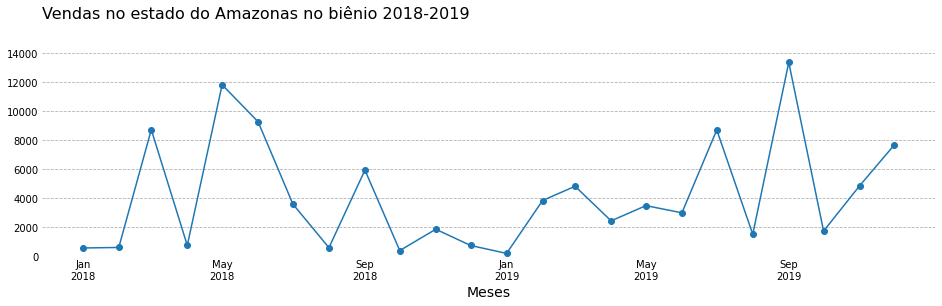

In [3]:
# Área do gráfico e tema da visualização
fig, ax = plt.subplots(figsize=(16,4))

# Criando o gráfico de linha das vendas pelo biênio 2018-2019
ax.plot(df_am["data_pedido"], df_am["vendas"], marker = "o")

## Personalizando o gráfico
ax.set_title('Vendas no estado do Amazonas no biênio 2018-2019', fontsize = 16, loc='left', pad = 20)
ax.set_xlabel('Meses', fontsize = 14)
ax.set_ylabel('')
ax.grid(axis = "y", linestyle="--")
ax.set_frame_on(False)

# remover todos os ticks do eixo x e y
ax.tick_params(axis='both', which='both', length=0)

# Descrevendo o limite mínimo e máximo do eixo y
plt.ylim(0, 15000)

# Definindo o intervalo de 4 em 4 meses (quadrimestre)
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth = range(1,12,4)))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b\n%Y"))
ax.set_xticks(ax.get_xticks()[:-1])   # retirando o último tick que não possui valores (Jan/2020)

plt.show()

Note que o gráfico apresenta todos os dados do `df_am`, mas o eixo x só apresenta o intervalo das datas que escolhemos.

Agora, vamos modificar o eixo x novamente com outro intervalo de tempo. Vamos apresentar os dados de tempo pela semana do ano que aquele dado é reconhecido aplicando a função `DayLocator()` no `set_major_locator()` e trazendo para o formato semana-ano aplicando a função `DateFormatter()` no `set_major_formatter()`:

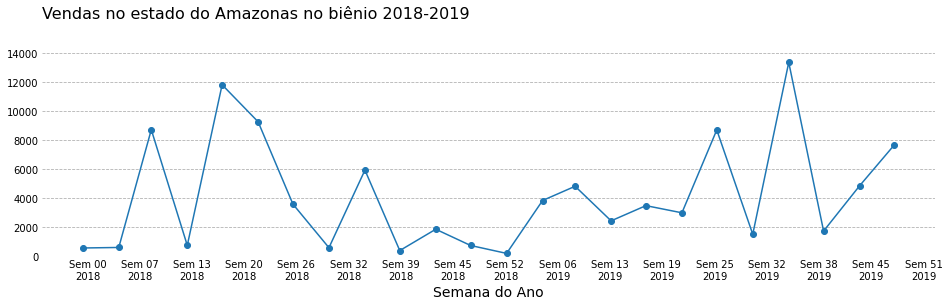

In [4]:
# Atualizando o gráfico para dados semanais
ax.set_xlabel('Semana do Ano', fontsize = 14)

# Definindo o intervalo em 45 dias e passando os valores de ticks como Semana e ano
ax.xaxis.set_major_locator(mdates.DayLocator(interval = 45))
ax.xaxis.set_major_formatter(mdates.DateFormatter("Sem %U\n%Y"))

ax.get_figure()

Note que a linha do gráfico não sofre alteração, pois ainda apresentamos todos os dados do `df_am`, mas o eixo x alterou o intervalo do tempo para o formato que definimos em `DateFormatter()`.

----

Resumindo, os métodos `set_major_locator` e `set_major_formatter` da biblioteca Matplotlib desempenham um papel crucial na construção de gráficos de linhas ao lidar com diferentes intervalos de dados, permitindo selecionar e formatar adequadamente os rótulos dos eixos temporais, proporcionando uma representação clara e significativa dos dados.

Esses métodos auxiliam as pessoas profissionais de dados a apresentar informações precisas e convincentes, facilitando a compreensão e a tomada de decisões. Portanto, dominar o uso desses métodos é essencial para criar gráficos de linhas eficazes e informativos, contribuindo para uma análise mais completa e robusta dos dados temporais.

## 5 - Nuvem de palavras
Aprendemos nesta aula a interpretar e construir as principais visualizações voltadas para distribuição dos dados. Entretanto, existe uma série de gráficos que podemos utilizar para este fim enriquecendo o nosso *storytelling*. Uma das formas é por meio do chamado **word cloud**, ou nuvem de palavras, que representa a distribuição de dados categóricos por meio das palavras-chave.

Através das nuvens de palavras, é possível ter uma visão rápida e intuitiva das palavras mais relevantes e sua frequência em um conjunto de dados representados pelos tamanhos que elas são exibidas na imagem.

Para criar esta visualização utilizando a linguagem Python, precisamos recorrer a biblioteca WordCloud, que já vem instalada de maneira nativa no Google Colab. Para testarmos a biblioteca, vamos recorrer ao projeto que fizemos nas primeiras aulas das vendas das lojas de departamento e desenvolver a nossa nuvem de palavras com os estados que mais aparecem no dataset.

### Nuvem de palavras dos estados
Primeiro importamos as bibliotecas que vamos utilizar. Um destaque para o método WordCloud() da biblioteca wordcloud responsável por gerar a nuvem de palavras e a função Image da biblioteca PIL(pillow) para podermos utilizar imagens dentro na nuvem de palavras (no exemplo a seguir).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image

Agora, vamos importar nossos dados, passando para um dicionário, como chaves, os nomes dos estados e, como valores, a contagem de repetições de cada estado na coluna estado. Na sequência criamos o objeto `WordCloud()` e geramos uma nuvem de palavras com o dicionário que criamos, passando-o como parâmetro do sub-método `generate_from_frequencies`:

In [3]:
# Importando o relatório de vendas
vendas = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/dataviz-graficos/master/dados/relatorio_vendas.csv")

# Gerando um dicionário de frequências
dic = dict(vendas["estado"].value_counts())

# Criar um objeto wordcloud
wordcloud = WordCloud()

# Cria uma wordcloud através do dicionário de frequências
wordcloud.generate_from_frequencies(frequencies = dic)

fig, ax = plt.subplots(figsize = (15, 10))
plt.imshow(wordcloud, interpolation = 'bilinear') 
ax.axis("off")    # retirando bordas e ticks

plt.show()

ValueError: Only supported for TrueType fonts

Por fim, definimos o tamanho da figura que vamos desenhar e exibimos a nuvem de palavras, retirando as bordas e elementos gráficos da tela. A nossa nuvem de palavras se assemelha a essa imagem:

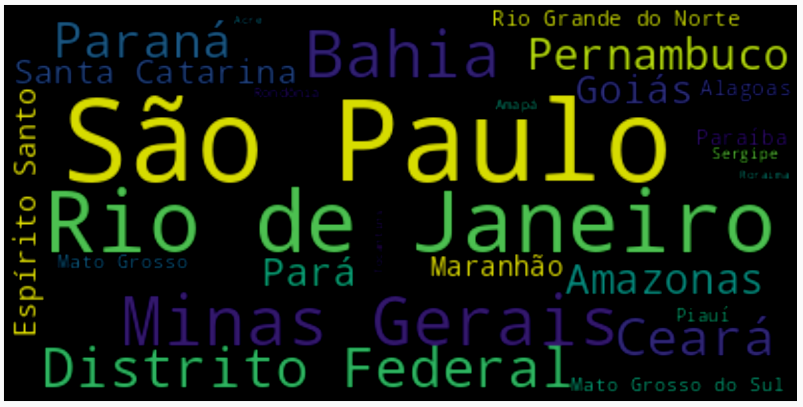

Como temos aleatoriedade na posição das palavras na nuvem de palavras, a imagem que aparece em seu colab notebook pode ser diferente da apresentada acima.

### Nuvem de palavras dos estados no formato do mapa do Brasil
Nossa nuvem de palavras já ficou bem interessante! Mas você sabia que podemos customizar o nosso objeto `WordCloud()` adicionando imagem de fundo, máscara, ajuste de cores e muito mais?

Pois bem, é exatamente isso que faremos agora! Para isso vou deixar aqui neste [link](https://cdn3.gnarususercontent.com.br/3057-data-visualization/Atividades/Aula+04/mapa_br.png) o mapa do Brasil do site da [Wikipedia](https://pt.m.wikipedia.org/wiki/Ficheiro:Contorno_do_mapa_do_Brasil.svg) que utilizaremos como espaço para escrever a nossa nuvem de palavras. Salve-a com o nome mapa_br.png para utilizarmos em nosso exemplo.

Com as bibliotecas e dados já importados, vamos fazer alguns ajustes no código para geração da nuvem de palavras. Primeiro, vamos manter o dataset que vamos utilizar e o dicionário com as frequências (contagens) dos dados. Agora, vamos abrir a imagem com o mapa do Brasil transformando-a em um array numpy. O símbolo de til ( ~ ) serve para inverter os valores do array para que possamos utilizar essa imagem como máscara pros dados serem escritos dentro do mapa.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image

# Importando o relatório de vendas 
vendas = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/dataviz-graficos/master/dados/relatorio_vendas.csv")

# Gerando um dicionário de frequências
dic = dict(vendas["estado"].value_counts())

# Abrir a imagem com o mapa do Brasil e transformá-lo em um array do numpy 
# o sinal til(~) inverte a máscara deixando o espaço dentro do mapa como local de desenho
image_mask = ~np.array(Image.open('mapa_br.png'))

Por fim, vamos recriar nosso objeto `WordCloud()` agora passando alguns parâmetros, como: cor do fundo, largura e altura da imagem, imagem a ser utilizada como máscara, cor do contorno da figura e as cores das palavras. A inserção dos dado no cloud e a personalização da área da figura segue da mesma forma:

In [ ]:
# Criar um objeto wordcloud
wordcloud = WordCloud(background_color = 'white',       # cor de fundo
                      width = image_mask.shape[1],      # largura
                      height = image_mask.shape[0],     # altura
                      mask = image_mask,                # imagem 
                      contour_color = 'white',          # cor do contorno
                      colormap = 'nipy_spectral_r')     # cor das palavras

# Cria uma wordcloud através do dicionário de frequências
wordcloud.generate_from_frequencies(frequencies = dic)

fig, ax = plt.subplots(figsize = (10, 8))
plt.imshow(wordcloud, interpolation = 'bilinear') 
ax.axis("off")    # retirando bordas e ticks
plt.show()

A nossa nova nuvem de palavras se assemelha a imagem abaixo:

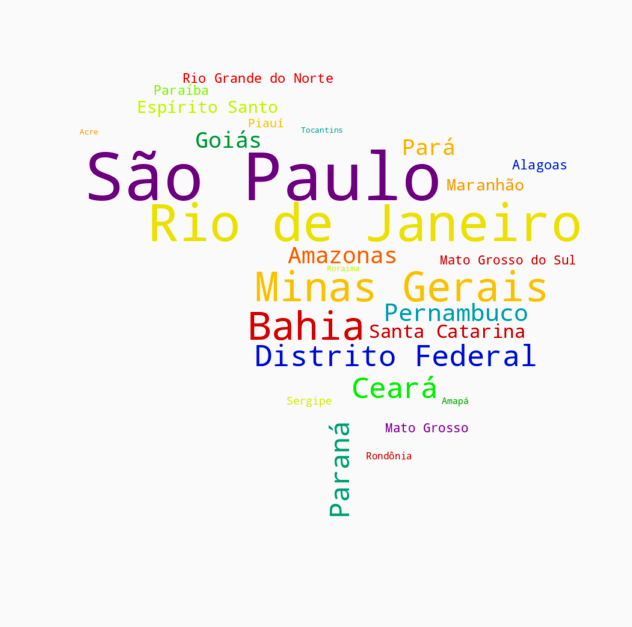

Note que as palavras agora foram ajustadas para que coubessem dentro do formato da imagem do mapa do Brasil. Muito legal, né?

Como temos aleatoriedade na posição das palavras na nuvem de palavras, a imagem que aparece em seu colab notebook pode ser diferente da apresentada acima.

Como sugestão, você pode acessar os seguintes links para se aprofundar na biblioteca da `WordCloud`:
- [Como fazer uma nuvem de palavras (Bonita) em Python](https://carodias.medium.com/como-fazer-uma-nuvem-de-palavras-bonita-em-python-fec7f9336ab1)
- [Gerar nuvens de palavras de qualquer formato no Python (em inglês)](https://www.geeksforgeeks.org/generate-word-clouds-of-any-shape-in-python/)

## 6 - aprofundando em visualização de dados
Parabéns por ter chegado até aqui em nosso curso de visualização de dados!

Aqui, você aprendeu a construir os principais tipos de visualização para comparação e distribuição de dados, criando gráficos eficazes e esteticamente agradáveis por meio das bibliotecas de visualização da linguagem Python.

Através de técnicas e ferramentas, você conseguiu responder aos questionamentos do projeto transformando seus dados no formato desejado para aquele tipo de visualização, trazendo alguns insights e comunicando de forma eficaz as histórias que os dados podem contar. Você adquiriu habilidades valiosas que certamente abrirão portas para oportunidades nesta área.

Gostaríamos de compartilhar algumas dicas de links que podem ajudá-lo a aprofundar ainda mais seus conhecimentos em visualização de dados:
- [Como escolher o gráfico certo para seus dados](https://infogram.com/pt/pagina/escolha-grafico-de-visualizacoes-certo)
- [Catálogo de Visualização de Dados (em inglês ou espanhol)](https://datavizcatalogue.com/index.html)
- [From Data to Viz (em inglês)](https://www.data-to-viz.com/)
- [Data Viz Project (em inglês)](https://datavizproject.com/)
- [Storytelling com dados - gráficos (em inglês)](https://www.storytellingwithdata.com/chart-guide)

Além disso, aconselhamos a leitura do livro [Storytelling with Data](http://www.storytellingwithdata.com/book/) (em português, **Storytelling com dados: Um guia sobre visualização de dados para profissionais de negócios**) da Cole Nussbaumer Knaflic. Ele é ideal para quem gosta do tema de visualização de dados e quer aprender a extrair a história de seus dados, mostrando suas análises de maneira mais eficiente para seu público. É possível encontrá-lo na versão em português em livrarias virtuais.

Este artigo [aqui (em inglês)](https://www.shiftelearning.com/blog/bid/350326/studies-confirm-the-power-of-visuals-in-elearning) também apresenta diferentes razões para que a visualização de dados seja utilizada como uma poderosa ferramenta de engajamento do nosso público.

Espero que tenha aprendido bastante e curtido esse nosso curso. Nos vemos numa próxima e até lá!